### KNN을 이용한 iris 데이터 꽃 종류 분류하기

In [1]:
#라이브러리 호출
import sklearn
import pandas as pd

In [2]:
#데이터 load
df = pd.read_csv("./data/iris.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
#컬럼명 확인
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'], dtype='object')

In [4]:
#features, target data set 분할
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

X = df[features] #features(X)는 행렬
y = df['class'] #target(y)는 벡터
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
#train/test data set split
from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te = train_test_split(X, y, random_state =6)
X_tn

,sepal_length,sepal_width,petal_length,petal_width
95,5.7,3.0,4.2,1.2
49,5.0,3.3,1.4,0.2
17,5.1,3.5,1.4,0.3
103,6.3,2.9,5.6,1.8
71,6.1,2.8,4.0,1.3
...,...,...,...,...
148,6.2,3.4,5.4,2.3
79,5.7,2.6,3.5,1.0
109,7.2,3.6,6.1,2.5
106,4.9,2.5,4.5,1.7


In [7]:
#데이터 표준화
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn)
X_te_std = std_scale.transform(X_te)
X_te_std

array([[-1.02176094,  1.21446329, -1.32647368, -1.30075363],
       [ 0.77568239, -0.192639  ,  0.98604232,  0.77120237],
       [-1.3812496 ,  0.27639509, -1.38287651, -1.30075363],
       [-0.90193138,  0.51091214, -1.15726519, -0.91226188],
       [ 0.53602328, -0.89619015,  0.64762534,  0.77120237],
       [-0.18295405, -0.42715605,  0.25280554,  0.12371612],
       [ 0.29636417, -1.1307072 ,  1.04244515,  0.25321337],
       [-0.90193138,  0.74542919, -1.27007085, -1.30075363],
       [ 0.65585283,  0.04187804,  0.98604232,  0.77120237],
       [-0.42261316, -1.83425835,  0.13999988,  0.12371612],
       [ 0.29636417, -0.192639  ,  0.64762534,  0.77120237],
       [-0.42261316, -1.5997413 , -0.02920861, -0.26477563],
       [ 0.65585283,  0.27639509,  0.87323666,  1.41868863],
       [ 2.21363705, -0.192639  ,  1.32445929,  1.41868863],
       [ 0.65585283, -0.42715605,  0.30920837,  0.12371612],
       [ 0.17653461, -2.0687754 ,  0.70402817,  0.38271062],
       [ 2.0938075 , -0.

In [8]:
#학습
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors=2)
clf_knn.fit(X_tn_std, y_tn)

KNeighborsClassifier(n_neighbors=2)

In [9]:
#예측
knn_pred = clf_knn.predict(X_te_std)
print(knn_pred)

[0 2 0 0 2 1 1 0 2 1 2 1 2 2 1 1 2 1 1 0 0 2 0 0 1 1 1 2 0 1 0 1 0 0 1 2 1
 2]


In [10]:
#정확도
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_te, knn_pred)
print(accuracy)

0.9210526315789473


In [11]:
#정밀도
from sklearn.metrics import precision_score
precision = precision_score(y_te, knn_pred, average='macro')
print(precision)

0.9333333333333332


In [12]:
#리콜
from sklearn.metrics import recall_score
recall = recall_score(y_te, knn_pred, average='macro')
print(recall)

0.9285714285714285


In [13]:
#F1 score
from sklearn.metrics import f1_score
f1 = f1_score(y_te, knn_pred, average='macro')
print(f1)

0.9229629629629629


In [14]:
#confusion matrix 
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_te, knn_pred)
print(conf_matrix)

[[12  0  0]
 [ 0 12  0]
 [ 0  3 11]]


In [15]:
from sklearn.metrics import classification_report
class_report = classification_report(y_te, knn_pred)
print(class_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.80      1.00      0.89        12
           2       1.00      0.79      0.88        14

    accuracy                           0.92        38
   macro avg       0.93      0.93      0.92        38
weighted avg       0.94      0.92      0.92        38



## 선형 회귀 분석 

In [16]:
#data load
import pandas as pd
df = pd.read_csv('./data/house_prices.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [17]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [18]:
#features, target 설정
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']
X = df[features]
y = df['MEDV']

In [19]:
#train/test data split
from sklearn.model_selection import train_test_split
#train, test size도 조정
X_tn, X_te, y_tn, y_te = train_test_split(X, y, random_state = 0, test_size = 0.4)

In [20]:
##OLS 회귀
import statsmodels.api as sm

# add_constant를 통해 상수항 생성
X_train = sm.add_constant(X_tn)

# 모델 형성 및 결과 출력
model = sm.OLS(y_tn, X_train).fit()
model.summary()

/Users/kangminhyeok/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     93.87
Date:                Thu, 20 Jul 2023   Prob (F-statistic):          9.85e-108
Time:                        14:17:30   Log-Likelihood:                -1102.0
No. Observations:                 379   AIC:                             2232.
Df Residuals:                     365   BIC:                             2287.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.9333      5.682      6.500      0.000      25.759      48.107
CRIM          -0.1177      0.037     -3.143      0.002      -0.191      -0.044
ZN             0.0440      0.015      2.933      0.004       0.015       0.074
INDUS         -0.0058      0.067     -0.086      0.931      -0.137       0.125
CHAS           2.3934      0.962      2.488      0.013       0.502       4.285
NOX          -15.5894      4.331     -3.600      0.000     -24.106      -7.073
RM             3.7690      0.472      7.981      0.000       2.840       4.698
AGE           -0.0070      0.015     -0.472      0.637      -0.036       0.022
DIS           -1.4350      0.224     -6.401      0.000      -1.876      -0.994
RAD            0.2401      0.073      3.301      0.001       0.097       0.383
TAX           -0.0113      0.004     -2.779      0.006      -0.019      -0.003
PTRATIO       -0.9855      0.145     -6.793      0.000      -1.271      -0.700
B              0.0084      0.003      2.782      0.006       0.002       0.014
LSTAT         -0.4991      0.058     -8.667      0.000      -0.612      -0.386
==============================================================================
Omnibus:                      141.715   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              665.545
Skew:                           1.549   Prob(JB):                    3.01e-145
Kurtosis:                       8.705   Cond. No.                     1.53e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

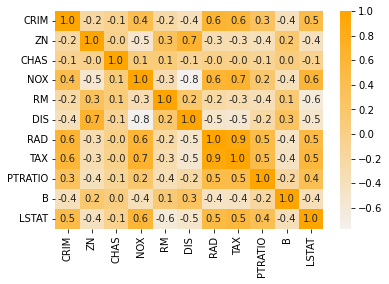

In [36]:
#상관계수 확인
from matplotlib import pyplot as plt
import seaborn as sns
X.corr()

cmap = sns.light_palette("orange", as_cmap=True)
sns.heatmap(X.corr(), annot=True, fmt="3.1f", cmap=cmap)
plt.show()

In [ ]:
#위의 결과를 통해 features 재설정 (INDUS, AGE 제거)
features = ['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']
X = df[features]#train/test data split

In [ ]:
#train, test set 다시 설정
X_tn, X_te, y_tn, y_te = train_test_split(X, y, random_state = 0, test_size = 0.4)

In [5]:
#data standadization
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn)
X_te_std = std_scale.transform(X_te)

In [6]:
#선형 회귀분석 학습
from sklearn.linear_model import LinearRegression
clf_lr = LinearRegression()
clf_lr.fit(X_tn_std, y_tn)

LinearRegression()

In [25]:
#선형 회귀분석 모형 추정 계수 확인
#coef_ : 계수(w, 가중치)
print(clf_lr.coef_)
#interept_ : 상수(b)
print(clf_lr.intercept_)

[-0.96551881  1.07145354  0.58847125 -1.88747049  2.58329133 -2.92939733
  2.11724138 -1.96701602 -2.17243859  0.74208207 -3.65798906]
22.608707124010557


In [7]:
#Ridge
#alpha = ridge 도형의 크기를 정해주는 것
#alpha default는 1
#fit_intercept : 상수항도 학습할 것인지 아닌지
#copy_X : 행렬 복사 해놓기
#-shallow copy : 값을 복사해놓는 것, ex) a=1 , b=a 해서 b값 바껴도 a값 안 바뀌게 하는 것
#-deep copy : 행렬에서는 shallow copy하면 안 되고 deep copy 해야함
#max_iter : 경사하강법에서 몇 번 할지
# 등등등...
#alpha = 0이면 Linear regression이랑 똑같음
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]
for alpha in alphas:
    clf_ridge = Ridge(alpha=alpha, max_iter = 10000)
    clf_ridge.fit(X_tn_std, y_tn)
    pred_ridge = clf_ridge.predict(X_te_std)
    print(f'alpha={alpha}일 때 : ', mean_squared_error(y_te, pred_ridge))
    

alpha=100일 때 :  28.005216312688642
alpha=10일 때 :  25.762701005834302
alpha=1일 때 :  25.679822358261294
alpha=0.1일 때 :  25.679816979918094
alpha=0.01일 때 :  25.679935674056267
alpha=0.001일 때 :  25.67994878824692
alpha=0.0001일 때 :  25.679950112168555


In [40]:
#Lasso
#alpah = lasso 도형의 크기를 정해주는 것
#precompute : 미리 내적 값 계산하고 저장하는 것 -> 중복 계산 맞기 위해 하는 것
from sklearn.linear_model import Lasso
clf_lasso = Lasso(alpha=0.1)
clf_lasso.fit(X_tn_std, y_tn)

Lasso(alpha=0.1)

In [41]:
#Lasso에서 alpha값 조절 하면서 MSE 확인
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]
for alpha in alphas:
    clf_lasso = Lasso(alpha=alpha)
    clf_lasso.fit(X_tn_std, y_tn)
    pred_lasso = clf_lasso.predict(X_te_std)
    print(f'alpha={alpha}일 때 : ',mean_squared_error(y_te, pred_lasso))

alpha=100일 때 :  81.7904659829155
alpha=10일 때 :  81.7904659829155
alpha=1일 때 :  35.48982989281176
alpha=0.1일 때 :  31.068822899034874
alpha=0.01일 때 :  29.757494070105068
alpha=0.001일 때 :  29.66882793966576
alpha=0.0001일 때 :  29.660407193485323


In [42]:
#Elastic_net
from sklearn.linear_model import ElasticNet
clf_elastic = ElasticNet(alpha=0.01, l1_ratio=0.01)
clf_elastic.fit(X_tn_std, y_tn)

ElasticNet(alpha=0.01, l1_ratio=0.01)

In [43]:
#ElasticNet에서 alpha값 조절 하면서 MSE 확인
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]
from sklearn.metrics import mean_squared_error
for alpha in alphas:
    clf_elastic = ElasticNet(alpha=alpha, l1_ratio=0.001)
    clf_elastic.fit(X_tn_std, y_tn)
    pred_elastic = clf_elastic.predict(X_te_std)
    print(f'alpha={alpha}일 때 : ',mean_squared_error(y_te, pred_elastic))

alpha=100일 때 :  78.60685320379633
alpha=10일 때 :  61.626259013937606
alpha=1일 때 :  39.17091159130835
alpha=0.1일 때 :  31.546593213792157
alpha=0.01일 때 :  29.876064273708867
alpha=0.001일 때 :  29.681090331229974
alpha=0.0001일 때 :  29.66162841553747


In [56]:
#예측
pred_lr = clf_lr.predict(X_te_std)
pred_ridge = clf_ridge.predict(X_te_std)
pred_lasso = clf_lasso.predict(X_te_std)
pred_elastic = clf_elastic.predict(X_te_std)

In [57]:
#모형 평가 - R제곱값
from sklearn.metrics import r2_score
print(r2_score(y_te, pred_lr))
print(r2_score(y_te, pred_ridge))
print(r2_score(y_te, pred_lasso))
print(r2_score(y_te, pred_elastic))

0.702360283018002
0.703268325784719
0.7064880522738524
0.7053270633965718


In [28]:
#모형 평가 - MSE
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_te, pred_lr))
print(mean_squared_error(y_te, pred_ridge))
print(mean_squared_error(y_te, pred_lasso))
print(mean_squared_error(y_te, pred_elastic))

NameError: name 'pred_lr' is not defined